In [13]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading dataset
dataset = pd.read_csv('data_banknote_authentication.txt', header=None)
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#splitting dataset into features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#training k-means model on training set
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_train)

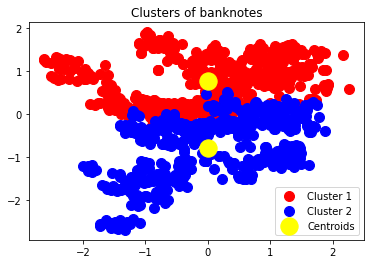

In [8]:
#visualizing clusters
plt.scatter(X_train[y_kmeans==0, 0], X_train[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_train[y_kmeans==1, 0], X_train[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of banknotes')
plt.xlabel
plt.ylabel
plt.legend()
plt.show()

In [9]:
#training neural network model on training set
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=4))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.6873
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.8642
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8897
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.9398
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.9608
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.9644
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.9681
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9736
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9736
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2335 - accura

110/110 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9863
Epoch 82/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9891
Epoch 83/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9881
Epoch 84/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9872
Epoch 85/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9872
Epoch 86/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9891
Epoch 87/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9872
Epoch 88/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9872
Epoch 89/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9863
Epoch 90/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 

In [10]:
#predicting test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

9/9 [==============================] - 0s 2ms/step


In [11]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[155,   2],
       [  0, 118]], dtype=int64)

In [12]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9927272727272727